In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [10]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import seaborn as sns


In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,
classification_report,accuracy_score, precision_score, recall_score, f1_score

SyntaxError: trailing comma not allowed without surrounding parentheses (4204048438.py, line 1)

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [14]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
import warnings

In [17]:
warnings.filterwarnings("ignore")

In [19]:
df=pd.read_csv("iris.csv")

In [20]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
print(df.shape)

(150, 6)


In [27]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [29]:
x = df.iloc[:,1:4]
y = df.iloc[:,4:5]

In [30]:
encode = LabelEncoder()
y_encoded = encode.fit_transform(y)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size = 0.3,
random_state = 0)

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
pred = naive_bayes.predict(x_test)

In [33]:
pred

array([14,  9,  3, 17,  1, 19,  1, 10, 11,  9, 15, 10, 11, 11, 11,  1,  9,
        9,  1,  1, 13,  9,  1,  2, 11,  0,  1,  9,  6,  1, 14,  9,  1, 14,
       20,  9,  3, 15,  9,  9, 17,  1, 14,  1,  3])

In [34]:
y_test

array([20,  6,  1, 14,  1, 21,  2, 11, 10,  9, 10, 11,  8, 11, 10,  0, 11,
        8,  2,  3, 16, 11,  1,  1, 14,  1,  3,  9,  6,  3, 14, 11,  1, 14,
       18, 10,  2, 12, 11,  8, 17,  1, 19,  5,  1])

In [38]:
matrix = confusion_matrix(y_test,pred,labels = naive_bayes.classes_)
print(matrix)
tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 4 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


In [39]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.24
Precision: 0.24
Recall: 0.24


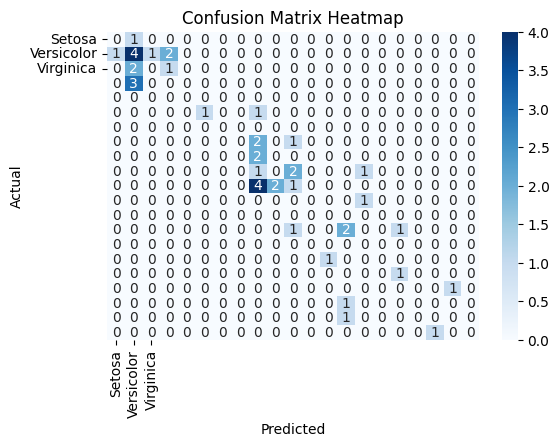

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa',
'Versicolor','Virginica'],
yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [41]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.36      0.50      0.42         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         3
           9       0.20      1.00      0.33         2
          10       0.00      0.00      0.00         4
          11       0.20      0.14      0.17         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.50      0.50      0.50         4
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.50      1.00      0.67         1
          18       0.00      0.00      0.00         1
          19       0.00    

In [42]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))



Accuracy: 0.24
Error Rate:  0.3333333333333333
Sensitivity (Recall or True positive rate) : 0.8
Specificity (True negative rate) : 0.0
Precision (Positive predictive value) : 0.8
False Positive Rate : 1.0
